## Loading labeled data

In [ ]:
#!c1.8

from functions import *

# fix random state and block_size for divison on blocks
random_state = 12345
block_size = 256

In [ ]:
#!c1.8

# loading labeled data
images, labels = load_data('/home/jupyter/mnt/datasets/DataLabeled', ['images', 'labels'], ['.tif', '.npy'])

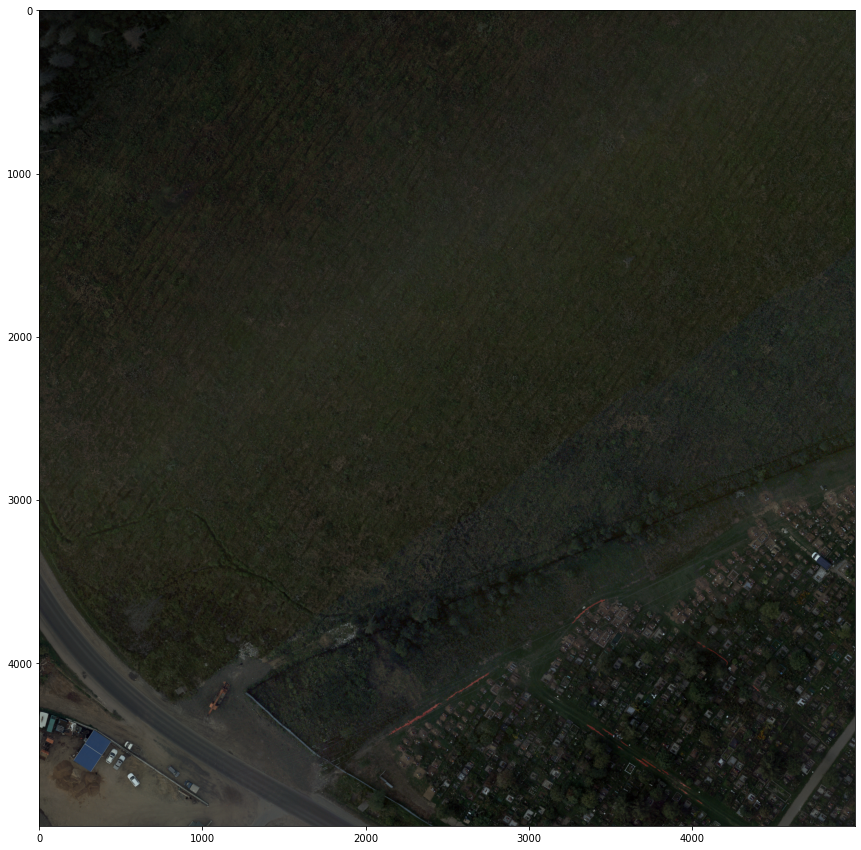

In [37]:

# visualizing image blended with mask
image_num = 30
show_images([ blend(images[image_num], labels[image_num]) ])

## Forming train and validation sets

In [38]:
#!c1.8

from sklearn.model_selection import train_test_split

images_train, images_val, labels_train, labels_val = train_test_split(images, labels, test_size=0.2, random_state=random_state, shuffle=True)
del images, labels

### Dividing images and masks on blocks

In [39]:
#!c1.8

X_train = get_blocks(images_train, block_size)
del images_train

y_train = get_blocks(labels_train, block_size)
del labels_train

X_val = get_blocks(images_val, block_size)
del images_val

y_val = get_blocks(labels_val, block_size)
del labels_val

print(f'Blocks num: {X_train.shape[0]}, {X_val.shape[0]}')





Blocks num: 6800, 1700


In [40]:
#!c1.8

sum_threshold = 40

indexes_train = np.argwhere(np.sum(y_train, axis=(1, 2)) > sum_threshold)
indexes_val = np.argwhere(np.sum(y_val, axis=(1, 2)) > sum_threshold)

print(f'Thresholded train blocks count and percentage: {indexes_train.shape[0]}, {indexes_train.shape[0] / y_train.shape[0]}')
print(f'Thresholded val blocks count and percentage: {indexes_val.shape[0]}, {indexes_val.shape[0] / y_val.shape[0]}')

Thresholded train blocks count and percentage: 504, 0.07411764705882352
Thresholded val blocks count and percentage: 118, 0.06941176470588235


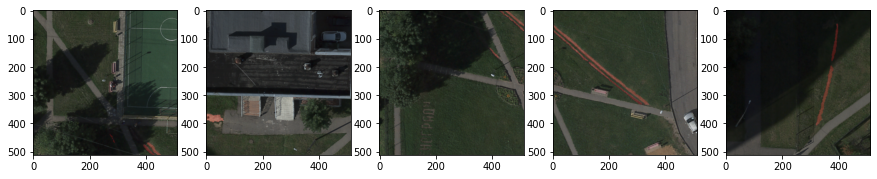

In [41]:
#!c1.8

# visualizing blocks blended with masks
blocks_num = [10, 12, 13, 14, 15]
blocks_blended = []
for i in indexes_train.take(blocks_num):
    blocks_blended.append(blend(X_train[i], y_train[i]))

show_images(blocks_blended)

In [42]:
#!c1.8

X_train_selected = np.squeeze(np.take(X_train, indexes_train, axis=0))
X_train_other = np.delete(X_train, indexes_train, axis=0)
del X_train

y_train_selected = np.squeeze(np.take(y_train, indexes_train, axis=0))
y_train_other = np.delete(y_train, indexes_train, axis=0)
del y_train


X_val_selected = np.squeeze(np.take(X_val, indexes_val, axis=0))
y_val_selected = np.squeeze(np.take(y_val, indexes_val, axis=0))
del X_val, y_val

In [51]:
#!c1.8

indexes_other = np.argwhere(np.sum(y_train_other, axis=(1, 2)) == 0)

X_train_other = np.squeeze(np.take(X_train_other, indexes_other, axis=0))
X_train_other = X_train_other[:X_train_other.shape[0] // 12]

y_train_other = np.squeeze(np.take(y_train_other, indexes_other, axis=0))
y_train_other = y_train_other[:y_train_other.shape[0] // 12]

In [48]:
#!c1.8

import random

import albumentations as A

In [49]:
#!c1.8

transforms_comp = A.Compose([
    A.RandomRotate90(),
    A.HorizontalFlip(),
    A.VerticalFlip(),
    A.Perspective()
])


transforms_one = A.OneOf([
    A.RandomRotate90(),
    A.HorizontalFlip(),
    A.VerticalFlip()
], p=1)

In [55]:
#!c1.8

random.seed(random_state)
num_augs_train = 4
num_augs_val = 4

X_train_transformed, y_train_transformed = get_augs(X_train_selected, y_train_selected, transforms_comp, num_augs_train)
del X_train_selected, y_train_selected
y_train_transformed = np.expand_dims(y_train_transformed, -1)

X_val, y_val = get_augs(X_val_selected, y_val_selected, transforms_one, num_augs_val)
del X_val_selected, y_val_selected
y_val = np.expand_dims(y_val, -1)

X_train_other = X_train_other.astype(np.float32)
X_train = np.concatenate((X_train_transformed, X_train_other), axis=0)
del X_train_transformed, X_train_other

y_train_other = np.expand_dims(y_train_other.astype(np.float32), -1)
y_train = np.concatenate((y_train_transformed, y_train_other), axis=0)
del y_train_transformed, y_train_other


print(f'Num of train and val images: {X_train.shape[0]}, {X_val.shape[0]}')

Num of train and val images: 2911, 447


In [56]:
#!c1.8
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('X_train', 9157214352),
 ('y_train', 3052404880),
 ('X_val', 1406140560),
 ('blend', 144),
 ('get_augs', 144),
 ('get_blocks', 144),
 ('k', 144),
 ('load_data', 144),
 ('mask_pipeline', 144),
 ('show_images', 144),
 ('train_test_split', 144),
 ('y_val', 144),
 ('blocks_blended', 136),
 ('blocks_num', 112),
 ('indexes_other', 112),
 ('indexes_train', 112),
 ('indexes_val', 112),
 ('A', 88),
 ('Image', 88),
 ('np', 88),
 ('plt', 88),
 ('EphemeralVariable.ML_KERNEL_CWD', 77),
 ('del_datasphere_variables', 72),
 ('execute_livy_statement', 72),
 ('execute_script', 72),
 ('sum_thresholds', 64),
 ('transforms_comp', 64),
 ('transforms_one', 64),
 ('i', 32),
 ('block_size', 28),
 ('image_num', 28),
 ('num_augs_train', 28),
 ('num_augs_val', 28),
 ('random_state', 28),
 ('sum_threshold', 28)]

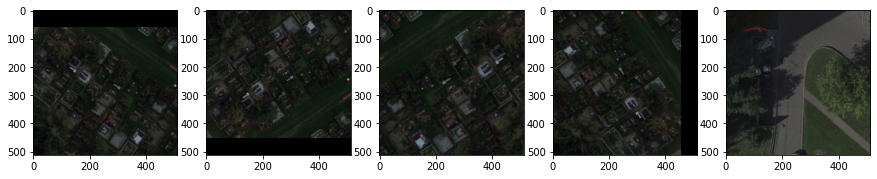

In [59]:
#!c1.8

# visualizing augmentations blended with masks
image_num = 10
augs_num = [image_num * num_augs_train + i for i in range(5)]
augs_blended = []
for i in augs_num:
    img = np.clip(X_train[i].astype(np.int32), 0, 255).astype(np.uint8)
    mask = np.clip(y_train[i][:,:,0].astype(np.int32), 0, 255).astype(np.uint8)
    augs_blended.append(blend(img, mask))

show_images(augs_blended)

## Training Neural Network

In [66]:
#!c1.8
from dl_models import *

In [104]:
#!c1.8

random.seed(random_state)
np.random.RandomState(random_state)
opt = Adam(1e-2)
model_checkpoint = ModelCheckpoint('checkpoint_final_vgg2.h5', monitor='val_f1_m', save_best_only=True, verbose=1, mode='max')
reduce_plato = ReduceLROnPlateau(monitor='val_loss', factor=0.094, patience=6, verbose=1, mode='max', cooldown=2)
# early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=9, verbose=1, restore_best_weights=True)
csvlogger = CSVLogger("logs_final_vgg2.csv", append=True)

In [105]:
#!g2.1

# model = AttentionUnet(block_size, wide=True)
model = vgg19_unet(block_size)

model.load_weights('weights_final20_vgg' + str(block_size) + '.h5')

model.compile(optimizer = opt, loss = weighted_binary_crossentropy, metrics = [dice, f1_m, precision_m, recall_m, iou, jaccard_coef])
model.fit(X_train, y_train,
            batch_size = 4,
            validation_data = (X_val, y_val),
            epochs = 10,
            callbacks = [model_checkpoint, reduce_plato, csvlogger],
            shuffle = True,
            verbose = 1)
model.save_weights('weights_final30_vgg' + str(block_size) + '.h5')

728/728 [==============================] - 124s 119ms/step - loss: 0.1383 - dice: 0.2276 - f1_m: 0.3673 - precision_m: 0.2779 - recall_m: 0.7040 - iou: 0.1354 - jaccard_coef: 0.1354 - val_loss: 0.1472 - val_dice: 0.2915 - val_f1_m: 0.4653 - val_precision_m: 0.4030 - val_recall_m: 0.6678 - val_iou: 0.1837 - val_jaccard_coef: 0.1837

Epoch 00001: val_f1_m improved from -inf to 0.46535, saving model to checkpoint_final_vgg2.h5
Epoch 2/10
728/728 [==============================] - 82s 112ms/step - loss: 0.1430 - dice: 0.2205 - f1_m: 0.3712 - precision_m: 0.2807 - recall_m: 0.7177 - iou: 0.1297 - jaccard_coef: 0.1297 - val_loss: 0.2010 - val_dice: 0.3018 - val_f1_m: 0.4678 - val_precision_m: 0.5278 - val_recall_m: 0.4922 - val_iou: 0.1931 - val_jaccard_coef: 0.1931

Epoch 00002: val_f1_m improved from 0.46535 to 0.46783, saving model to checkpoint_final_vgg2.h5
Epoch 3/10
728/728 [==============================] - 82s 112ms/step - loss: 0.1228 - dice: 0.2399 - f1_m: 0.3901 - precision_m: 0.

KeyboardInterrupt: 

In [67]:
#!g1.1

# getting predictions on validation images

# model = AttentionUnet(block_size, wide=True)
model = vgg19_unet(block_size)
model.load_weights('weights_final20_vgg' + str(block_size) + '.h5')
y_pred = model.predict(X_val)

label sum: 6733.44677734375, rounded label sum: 2111.0, gt sum: 1053.0


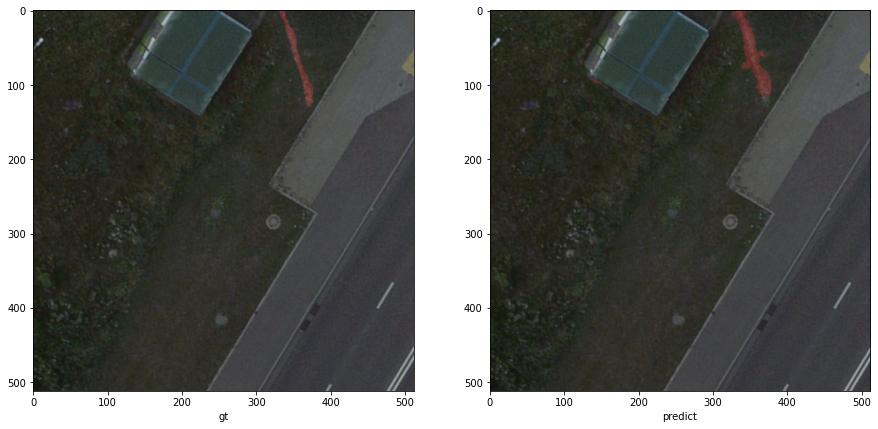

In [82]:
#!g1.1

# visualizing validation block blended with mask

test_num = 14
print(f"label sum: {np.sum(y_pred[test_num])}, rounded label sum: {np.sum(np.round(y_pred[test_num]))}, gt sum: {np.sum(y_val[test_num])}")
gt_img = np.clip(X_val[test_num].astype(np.int32), 0, 255).astype(np.uint8)
gt_y = np.clip(y_val[test_num].astype(np.int32), 0, 255).astype(np.uint8)
pred_y = np.clip(np.round(y_pred[test_num]).astype(np.int32), 0, 255).astype(np.uint8)
gt_blend = blend(gt_img, gt_y)
test_blend = blend(gt_img, pred_y)

show_images([gt_blend, test_blend], titles=['gt', 'predict'])

In [97]:
#!g1.1

# loading test image
test_image = io.imread('/home/jupyter/mnt/datasets/RawData/3536-813.tif')
test_label = np.load('/home/jupyter/mnt/datasets/DataLabeled/labels/3536-813.npy')

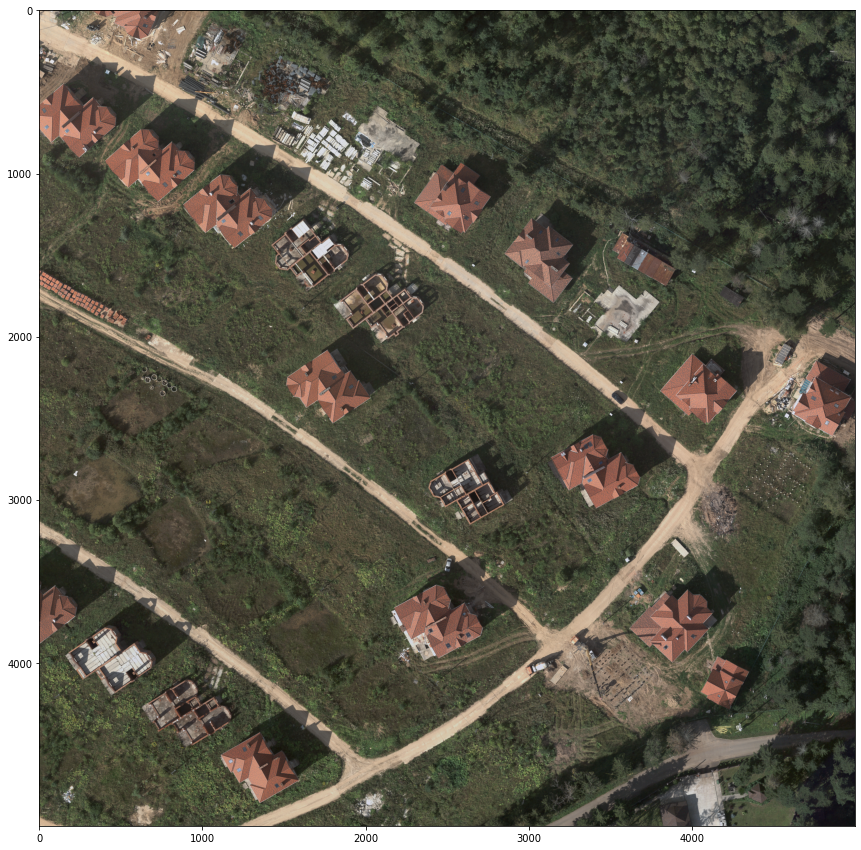

In [98]:
#!g1.1

show_images([test_image])

In [99]:
#!g1.1

model = AttentionUnet(block_size, wide=True)
# model = vgg19_unet(block_size)
model.load_weights('weights_final20_vgg' + str(block_size) + '.h5')

test_predict = mask_pipeline(test_image, model, block_size)

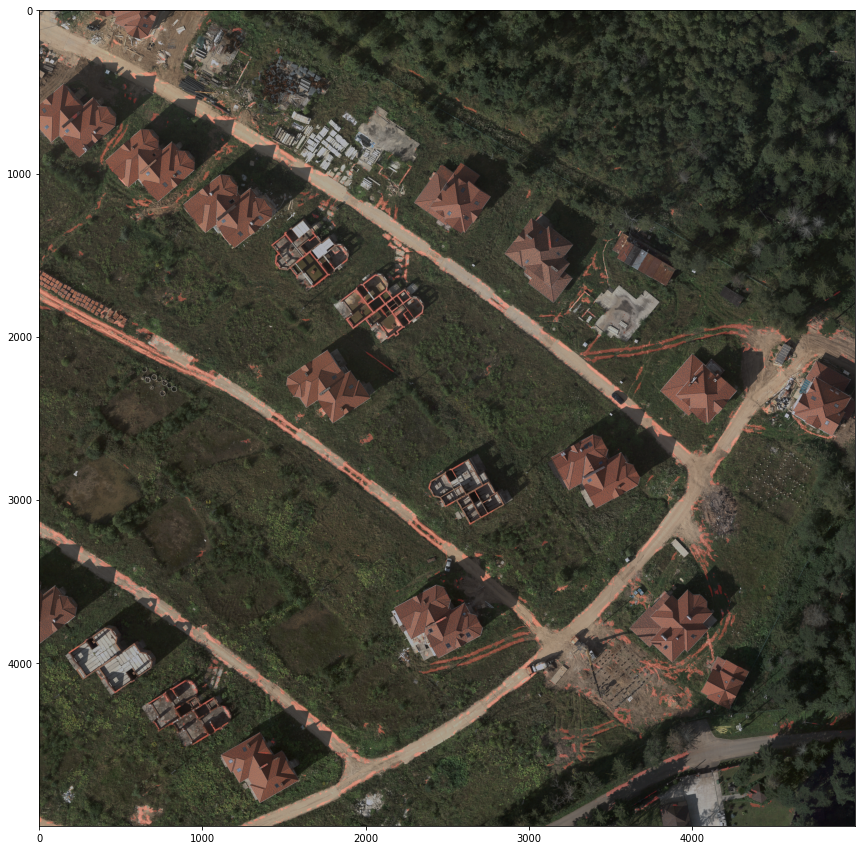

In [101]:
#!g1.1

test_blend = blend(test_image, test_predict)
show_images([test_blend])

In [145]:
#!g1.1

# model = vgg19_unet(block_size)
# model = AttentionUnet(block_size, wide=True)
# model.load_weights('weights_1_vgg' + str(block_size) + '.h5')
# model.save('pre_labeling_pipelinev2_new')

INFO:tensorflow:Assets written to: pre_labeling_pipelinev2/assets
